# Creating Regions from the images of the supernova

In [37]:
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from matplotlib import pyplot as plt
from regions import Regions


In [38]:
df = pd.read_csv('HST.csv')
RA = df['RA']
Dec = df['Dec']

211.65662 -5.43942


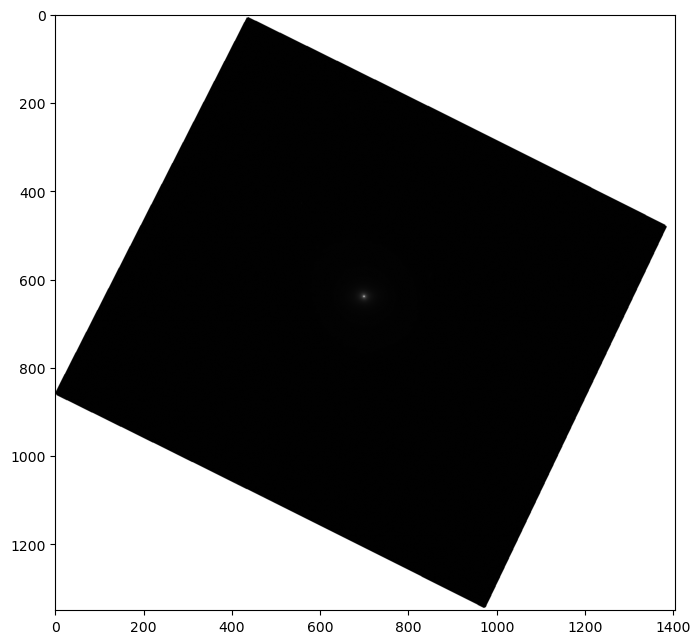

In [46]:
image_file = get_pkg_data_filename('pantheon_data_folder/1997bq/mastDownload/HST/hst_15145_3b_wfc3_ir_f160w_idgg3b/hst_15145_3b_wfc3_ir_f160w_idgg3b_drz.fits')
image_data = fits.getdata(image_file)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_data, cmap='gray')
"""
region_file = get_pkg_data_filename('data/plot_image.reg',
                                    package='regions.io.ds9.tests')

regions = Regions.read(region_file, format='ds9')
for i, region in enumerate(regions):
    region.plot(ax=ax)
"""
print(RA[0], Dec[0])
center = SkyCoord(ra= RA[0]*u.degree, dec=Dec[0]*u.degree, frame='icrs')

radius = Angle(200, 'deg')
region = CircleSkyRegion(center, radius)
pixel_region = region.to_pixel(wcs)
pixel_region.plot(color = 'r')



In [40]:
Regions.get_formats()

Format,Parse,Serialize,Read,Write,Auto-identify
str4,str3,str3,str3,str3,str3
crtf,Yes,Yes,Yes,Yes,Yes
ds9,Yes,Yes,Yes,Yes,Yes
fits,Yes,Yes,Yes,Yes,Yes


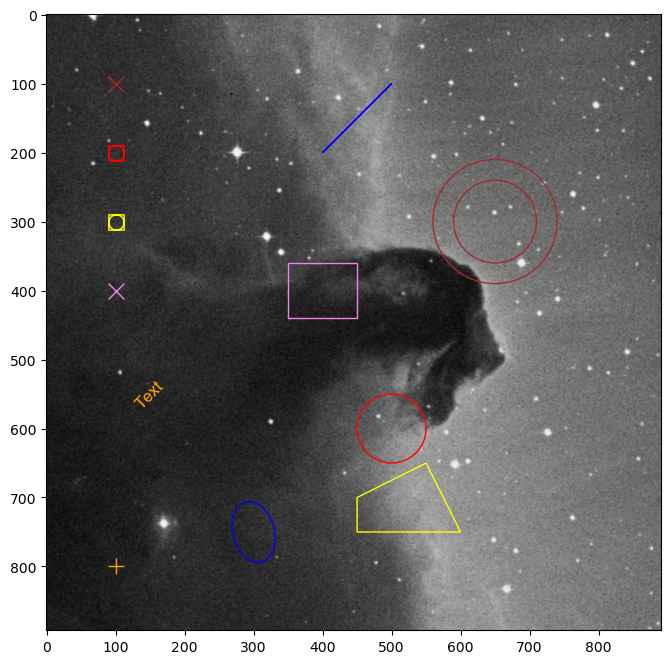

In [41]:

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
image_data = fits.getdata(image_file, ext=0, memmap=False)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_data, cmap='gray')
#ax.set_ylim([-0.5, 892.5])

region_file = get_pkg_data_filename('data/plot_image.reg',
                                    package='regions.io.ds9.tests')
regions = Regions.read(region_file, format='ds9')
for i, region in enumerate(regions):
    region.plot(ax=ax)
